# TELECOM CHURN CASE STUDY


### Business Problem Overview

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#### For many incumbent operators, retaining high profitable customers is the number one business goal.

 

#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

#### In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Business Goals:
1. Predict which customers are at high risk of churn.
2. Recommend strategies to manage customer churn.

#### The case study is divided into the below steps:

1. Reading and Understanding the Data.
2. Exploratory Data Analysis.
3. Data Modeling.
4. Model Comparisons.
5. Conclusion.


### Let's Start!

## Step 1: Reading and Understanding the Data

Let us first import NumPy, Pandas and other required libraries.

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
import os

from PIL import  Image
import pandas as pd
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

# for visualization
import seaborn as sns
import plotly.offline as py 
import matplotlib.pyplot as plt
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as sub_plots
import plotly.figure_factory as ff
from sklearn import metrics

In [2]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\Abhinav\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [3]:
# this ensures that all the plots and graphs are shown irrespective of Kernel refresh/reload.
%matplotlib notebook
%matplotlib notebook
%matplotlib inline

#### Read the data

In [4]:
telecom_churn_df = pd.read_csv("telecom_churn_data.csv")
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
telecom_churn_df.shape

(99999, 226)

#### Pretty huge data set this with a hundred thousand rows and over two hundred columns.

#### Common Utility Methods

In [6]:
# Method to get colored text based on value
def get_colored_text(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color

# Method to draw a heatmap
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
nullvalues = round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)
print(nullvalues[nullvalues > 0].sort_values(ascending = False))
print(nullvalues.size)

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
av_rech_amt_data_6          74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
arpu_3g_6                   74.85
arpu_3g_7                   74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
total_rech_data_7           74.43
total_rech_data_9           74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
arpu_2g_9                   74.08
arpu_3g_9     

In [9]:
#impute with zeroes
nullreplacezero_columns =  telecom_churn_df.columns[telecom_churn_df.columns.str.contains('_amt|count_|fb_user|_pck|total_|max_|_mou|_others')]
print(nullreplacezero_columns)
telecom_churn_df[nullreplacezero_columns].describe()

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object', length=171)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94

In [10]:
#After looking at the min values and other desrciptive stats about each of the columns 
# we can be certain about replacing NAs with zeroes in these columns
for col in nullreplacezero_columns:
    telecom_churn_df[col] = telecom_churn_df[col].replace(np.NaN,0.0)

In [11]:
# getting rid of columns with just 1 unique value
single_val_cols = telecom_churn_df.columns[telecom_churn_df.nunique() == 1]
print('Dropping these columns: \n',single_val_cols.values)
# Let's drop these as thy don't add any value to our analysis.
telecom_churn_df.drop(single_val_cols,axis=1,inplace=True)
telecom_churn_df.shape

Dropping these columns: 
 ['circle_id' 'loc_og_t2o_mou' 'std_og_t2o_mou' 'loc_ic_t2o_mou'
 'last_date_of_month_6' 'last_date_of_month_7' 'last_date_of_month_8'
 'last_date_of_month_9' 'std_og_t2c_mou_6' 'std_og_t2c_mou_7'
 'std_og_t2c_mou_8' 'std_og_t2c_mou_9' 'std_ic_t2o_mou_6'
 'std_ic_t2o_mou_7' 'std_ic_t2o_mou_8' 'std_ic_t2o_mou_9']


(99999, 210)

In [12]:
# Removing date columns because these wouldn't give any valuable insights about churn.
date_columns =  telecom_churn_df.columns[telecom_churn_df.columns.str.contains('date')]
print('Dropping these columns: \n',date_columns.values)
telecom_churn_df.drop(date_columns,axis=1,inplace=True)
telecom_churn_df.shape

Dropping these columns: 
 ['date_of_last_rech_6' 'date_of_last_rech_7' 'date_of_last_rech_8'
 'date_of_last_rech_9' 'date_of_last_rech_data_6'
 'date_of_last_rech_data_7' 'date_of_last_rech_data_8'
 'date_of_last_rech_data_9']


(99999, 202)

In [13]:
nullvalues = round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)
print(nullvalues[nullvalues > 0].sort_values(ascending = False))

arpu_2g_6    74.85
arpu_3g_6    74.85
arpu_2g_7    74.43
arpu_3g_7    74.43
arpu_2g_9    74.08
arpu_3g_9    74.08
arpu_2g_8    73.66
arpu_3g_8    73.66
dtype: float64


In [14]:
#Dropping the arpu columns because nullvalues are percentages are > 70%, and there is no correct way to impute these
telecom_churn_df.drop((nullvalues[nullvalues > 0].index).tolist(),axis=1, inplace= True)

#### In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase [Month 6 & 7]
The ‘action’ phase [Month 8]
The ‘churn’ phase [Month 9]
In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

##### 1. Deriving New Features.

##### We can derive the below columns from the above amount columns:
1. Total Recharge Amount Data.
2. Total Average Amount for the 'Good Phase' i.e. the months 6 & 7.

In [15]:
# new column Total_Recharge_Amount_Data = av_rech_amt*total_rech_data for each month
telecom_churn_df['total_rech_amt_data_6'] = telecom_churn_df.av_rech_amt_data_6 * telecom_churn_df.total_rech_data_6
telecom_churn_df['total_rech_amt_data_7'] = telecom_churn_df.av_rech_amt_data_7 * telecom_churn_df.total_rech_data_7
telecom_churn_df['total_rech_amt_data_8'] = telecom_churn_df.av_rech_amt_data_8 * telecom_churn_df.total_rech_data_8

In [16]:
telecom_churn_df['total_avg_rech_amt_6_7'] = (telecom_churn_df.total_rech_amt_6 + telecom_churn_df.total_rech_amt_data_6 \
                                               + telecom_churn_df.total_rech_amt_7+ telecom_churn_df.total_rech_amt_data_7)/2

##### 2. Filtering High-Value Customers.

As mentioned in the problem statement, we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [17]:
high_value_filter = telecom_churn_df.total_avg_rech_amt_6_7.quantile(0.7)
telecom_churn_high_val_cust_df = telecom_churn_df[telecom_churn_df.total_avg_rech_amt_6_7 > high_value_filter]
telecom_churn_high_val_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308

In [18]:
telecom_churn_high_val_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 198 entries, mobile_number to total_avg_rech_amt_6_7
dtypes: float64(164), int64(34)
memory usage: 45.5 MB


##### We get 29.9K records, as expected as per the problem statement.

##### 3. Tag churners and remove attributes of the churn phase.
Now, let's tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, let's remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [19]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [20]:
# Checking the NA/Null values are present or Not
df = 100*telecom_churn_high_val_cust_df.loc[:,high_val_cust_9].isnull().sum()/len(telecom_churn_high_val_cust_df)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage).style.applymap(get_colored_text)
display(df)

,Null_Percentage
total_ic_mou_9,0.000000
total_og_mou_9,0.000000
vol_2g_mb_9,0.000000
vol_3g_mb_9,0.000000


In [21]:
# Initially set all the values as 0
telecom_churn_high_val_cust_df['churn']= 0

#use a flag is_churned boolean flag for customers where above values are zero
is_churned = (telecom_churn_high_val_cust_df.total_ic_mou_9 == 0) & \
             (telecom_churn_high_val_cust_df.total_og_mou_9 == 0) & \
             (telecom_churn_high_val_cust_df.vol_2g_mb_9 ==0) & \
             (telecom_churn_high_val_cust_df.vol_3g_mb_9 ==0)

# use this value to mark customers as 'churned' or 'not-churned', i.e. '1' or '0'
telecom_churn_high_val_cust_df.loc[is_churned,'churn']=1

In [22]:
telecom_churn_high_val_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,

In [23]:
# Get the % of 'Churners'
print(100*telecom_churn_high_val_cust_df.churn.sum()/len(telecom_churn_high_val_cust_df))

8.122725603445398


##### Around 8.12% of the high-value customers are likely to churn as per the above data.

##### Let's drop all the 'Churn Phase' columns as mentioned in the problem statement, i.e. all the columns containing '_9' in them.

In [24]:
#Separating churn and non churn customers
churn     = telecom_churn_high_val_cust_df[telecom_churn_high_val_cust_df["churn"] == 1]
not_churn = telecom_churn_high_val_cust_df[telecom_churn_high_val_cust_df["churn"] == 0]

In [25]:
churn_month_columns =  telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('_9')]
telecom_churn_high_val_cust_df.drop(churn_month_columns,axis=1,inplace=True)

In [26]:
#Dropping mobile_number column, because its an ID column and it won't provide any insights for modeling
telecom_churn_high_val_cust_df.drop('mobile_number',axis=1,inplace=True)

In [27]:
telecom_churn_high_val_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 151 entries, arpu_6 to churn
dtypes: float64(125), int64(26)
memory usage: 34.7 MB


## Step 2: EDA

#### Customer Churn in Data.

### Let's impute categorical and numerical columns before we proceed.

In [28]:
#labels
lab = telecom_churn_high_val_cust_df["churn"].value_counts().keys().tolist()
#values
val = telecom_churn_high_val_cust_df["churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer Churn in Data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

##### Churn rate (8.12%) of the pie-chart matches with that arrived before.

#### 3.1 Variables contributing to Customer Churn in Data.

In [29]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [30]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [31]:
# create box plot for  6th, 7th and 8th month columns for recharge amount in various categories
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_churn_high_val_cust_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

#### Let's do box plotting on all the amount columns to see their trends during Good & Action Phases.

In [32]:
recharge_amt_columns =  telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('rech_amt')]
recharge_amt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8',
 'total_avg_rech_amt_6_7']

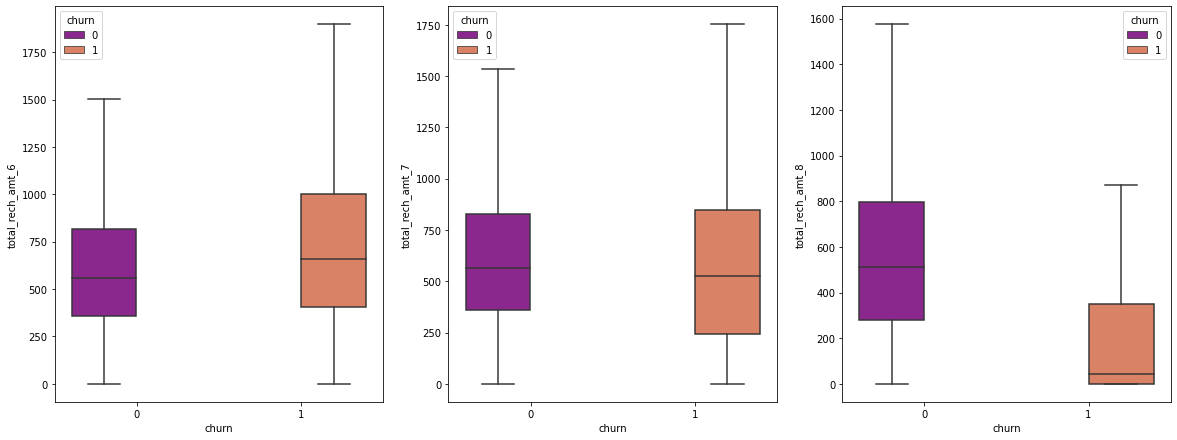

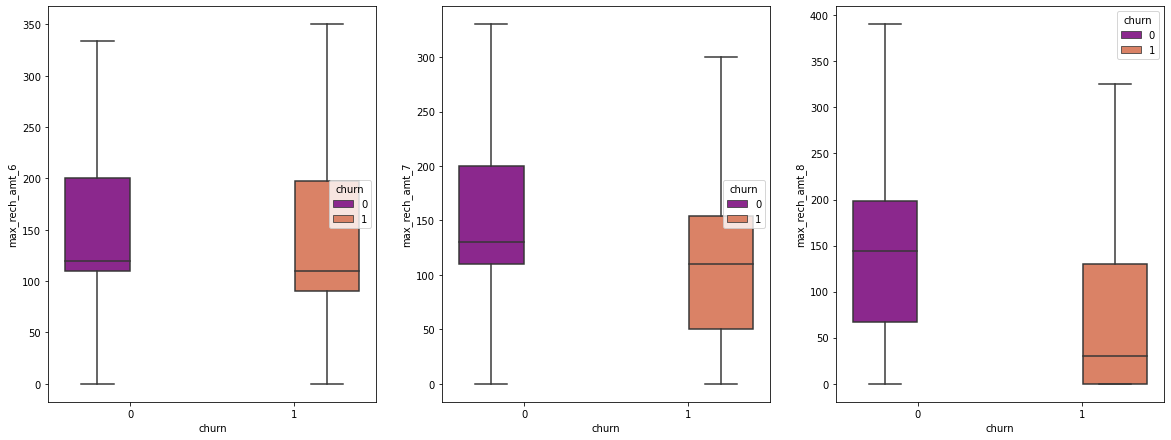

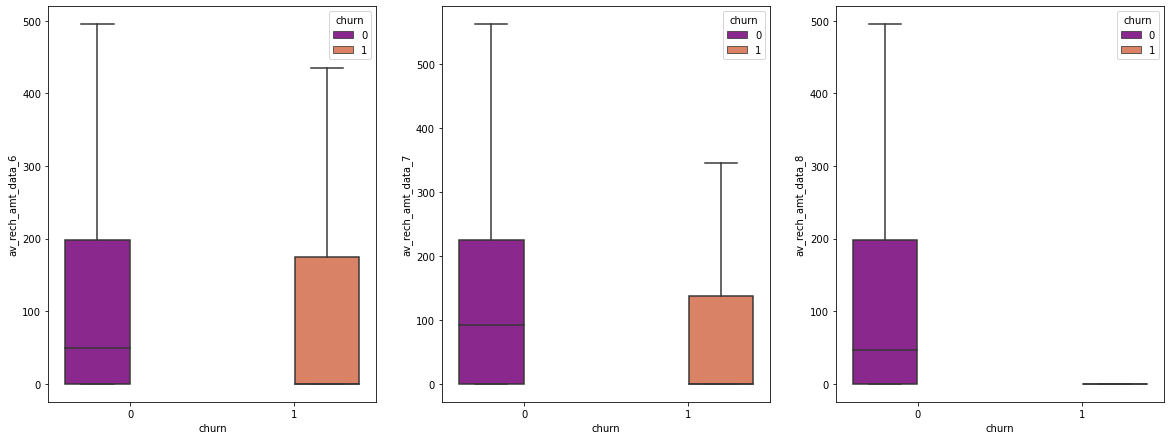

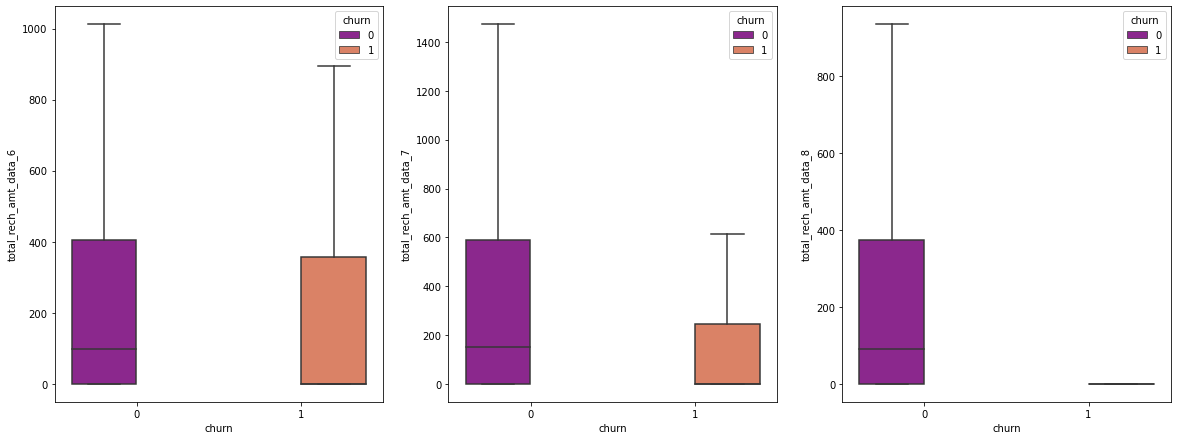

In [33]:
# Box Plots on recharge amout columns other columns which are numeric and related to users recharge actions:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')
plot_box_chart('total_rech_amt_data')


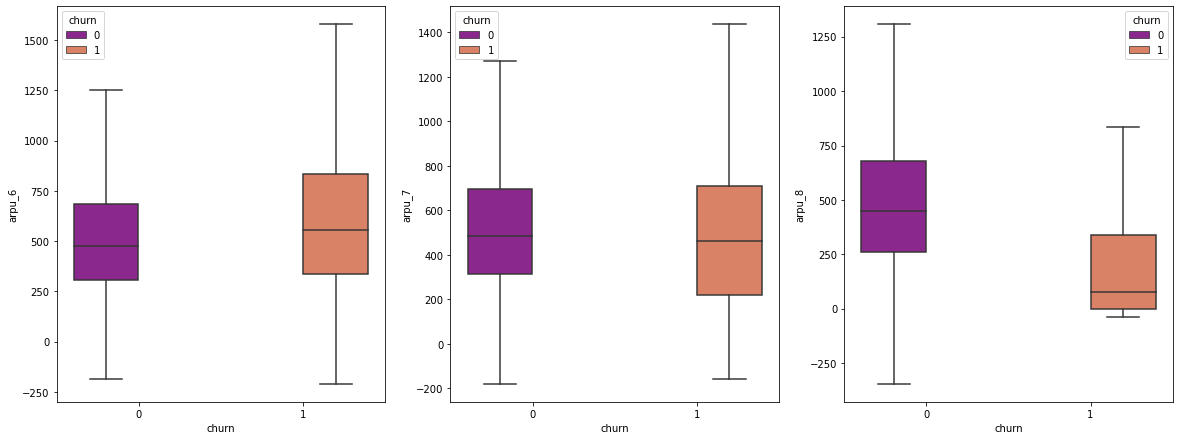

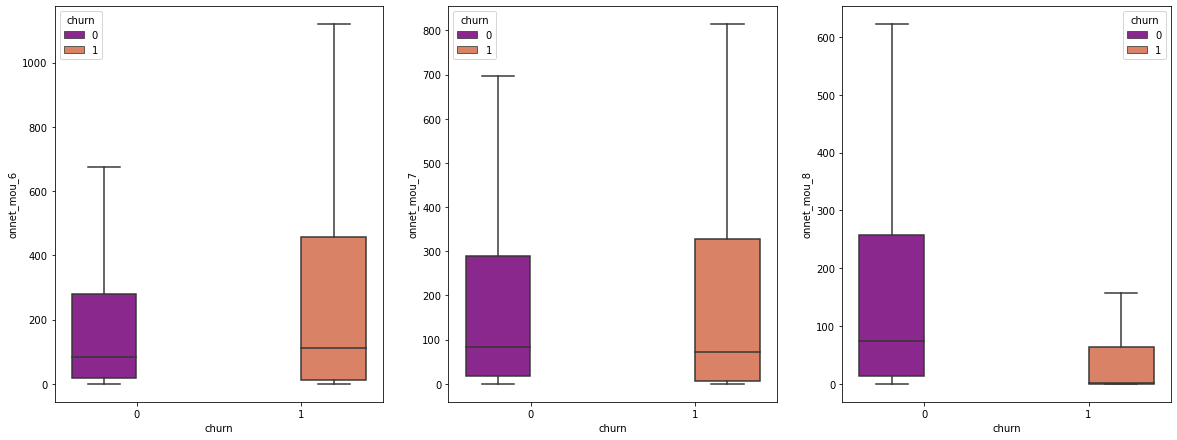

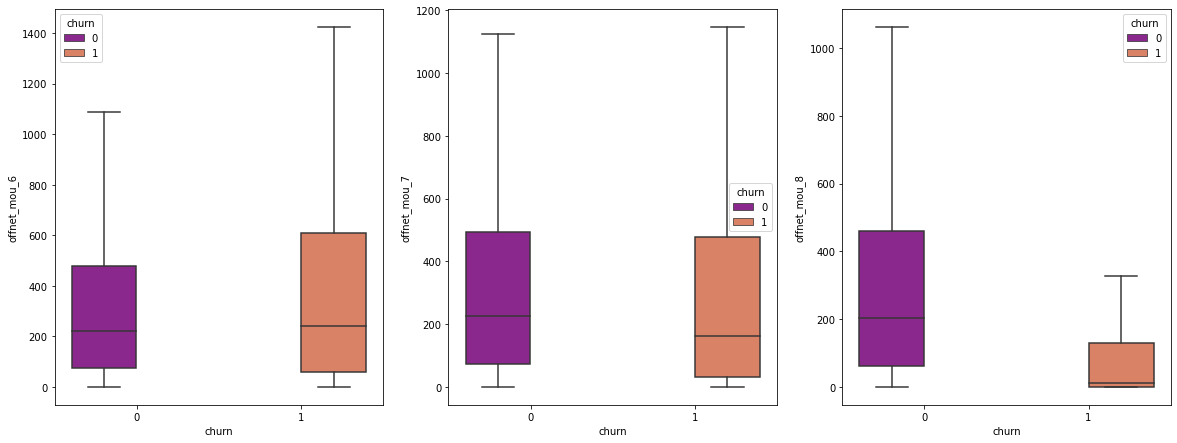

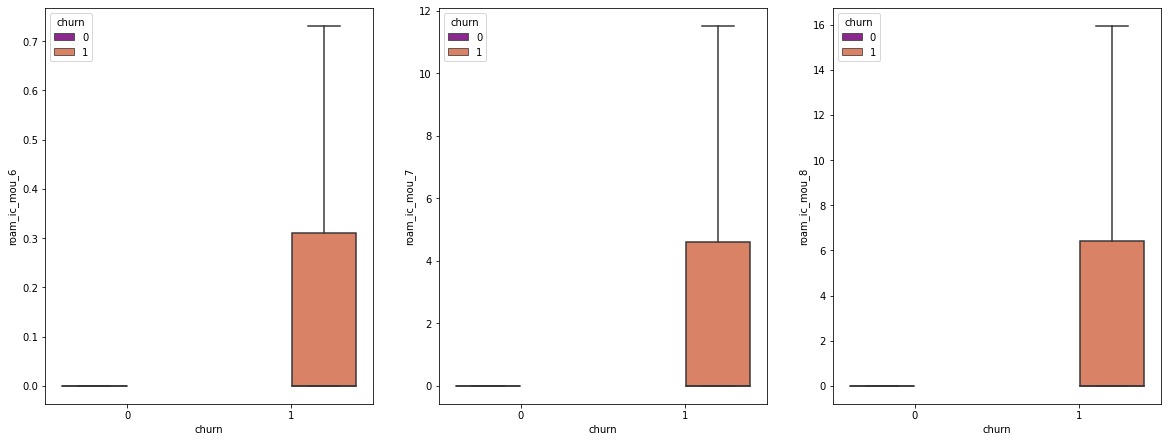

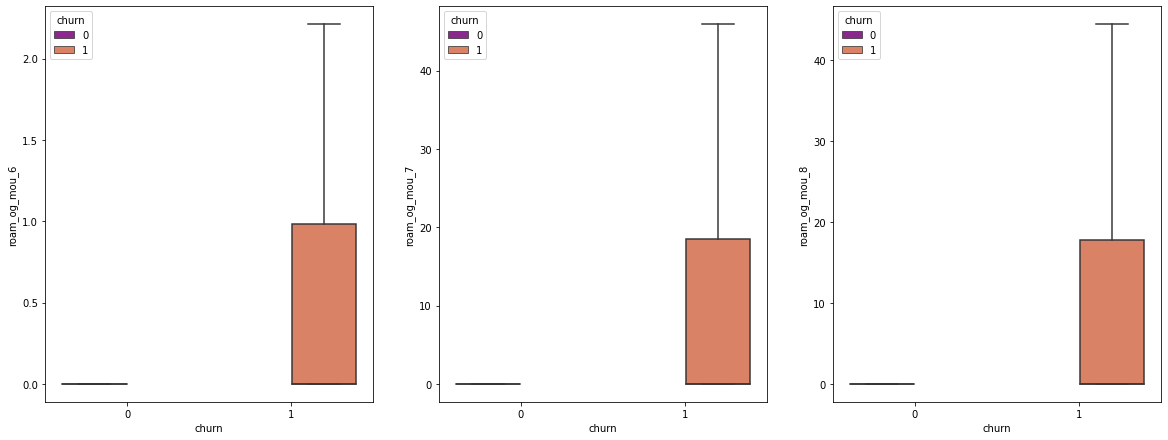

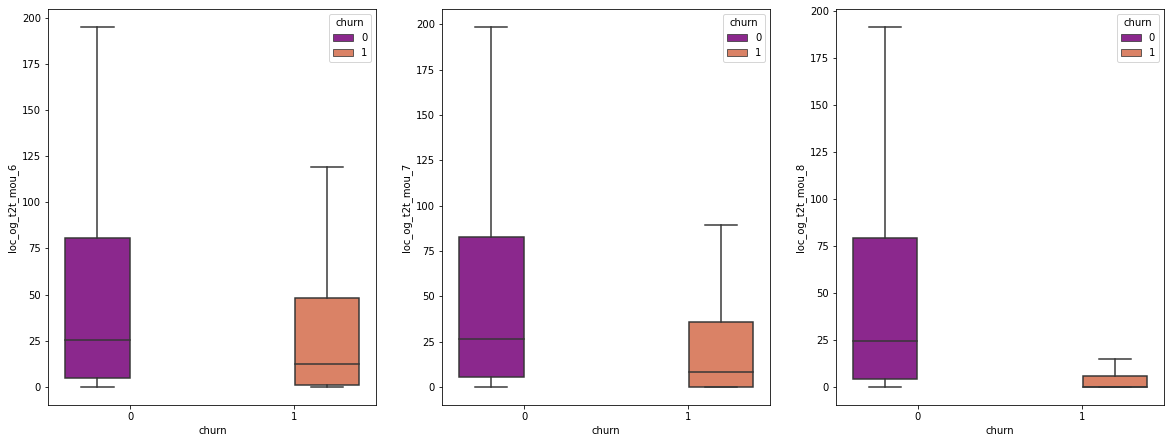

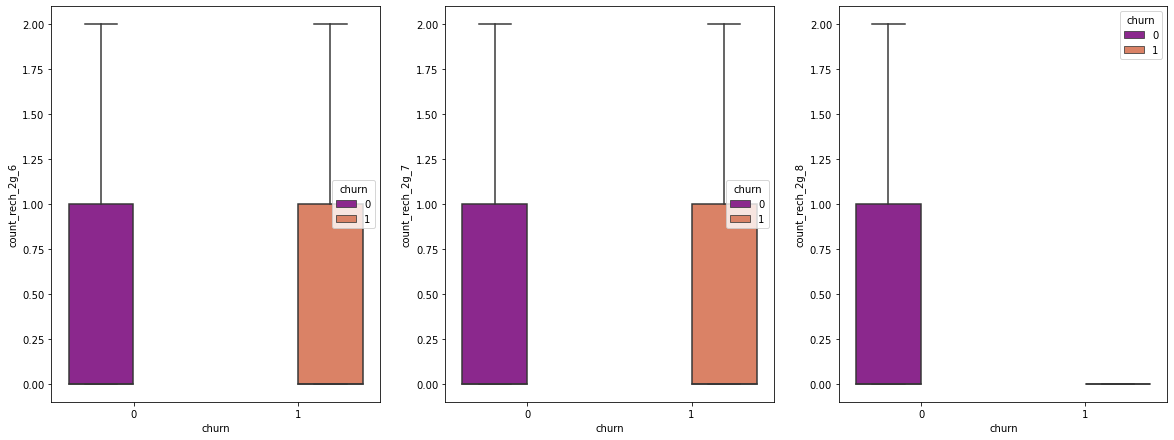

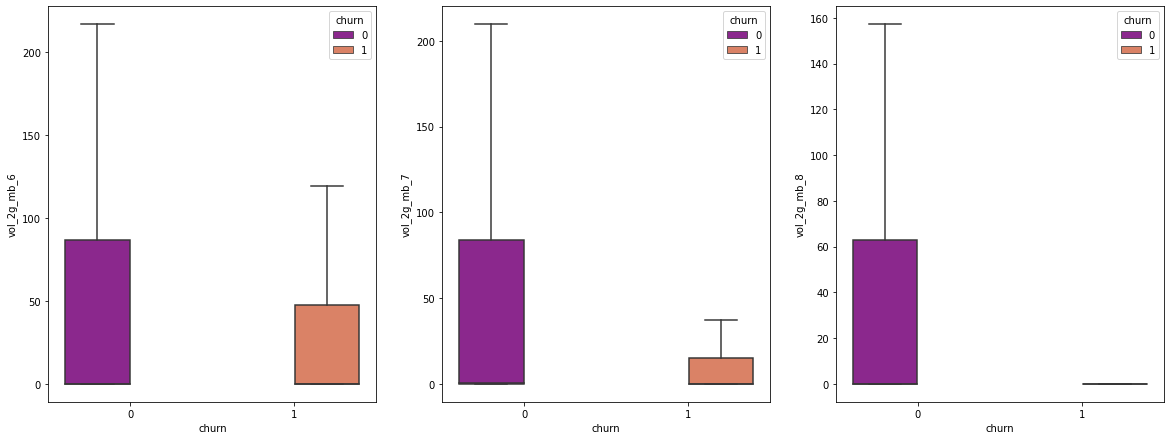

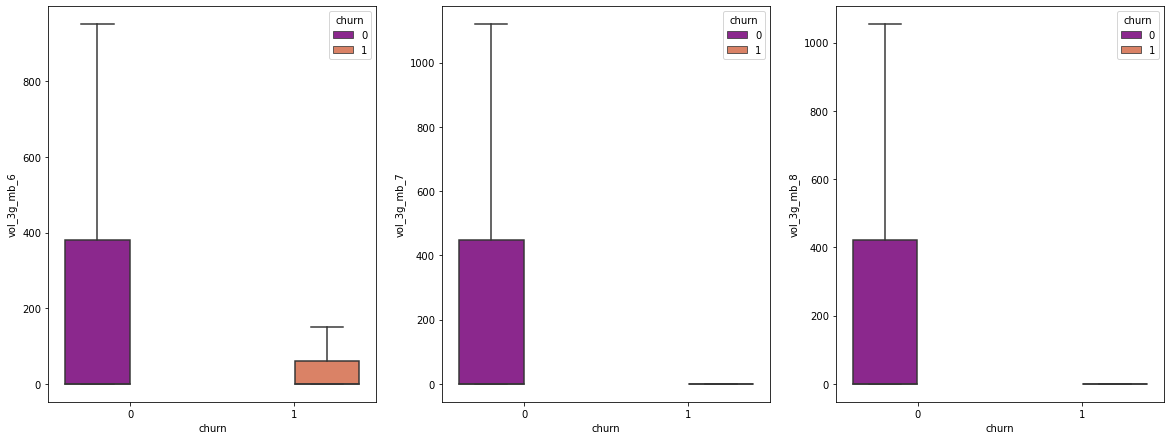

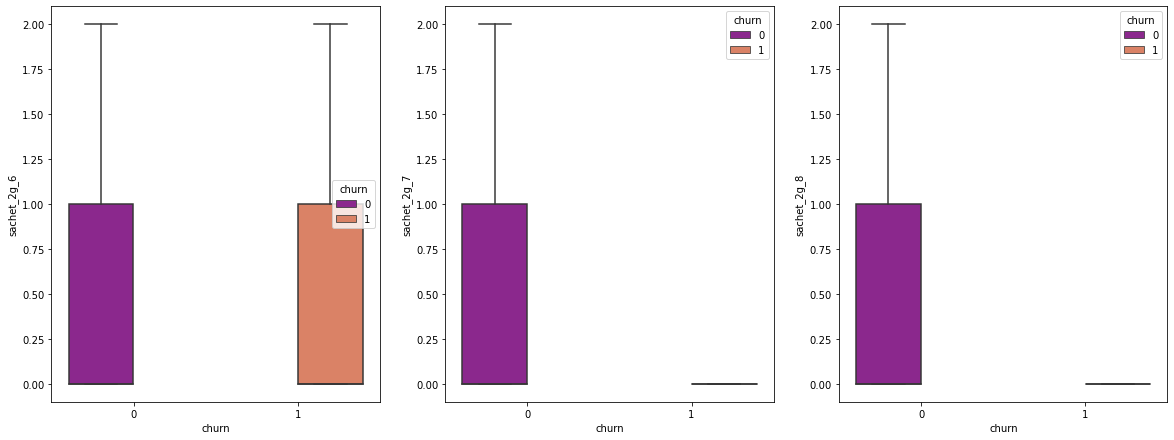

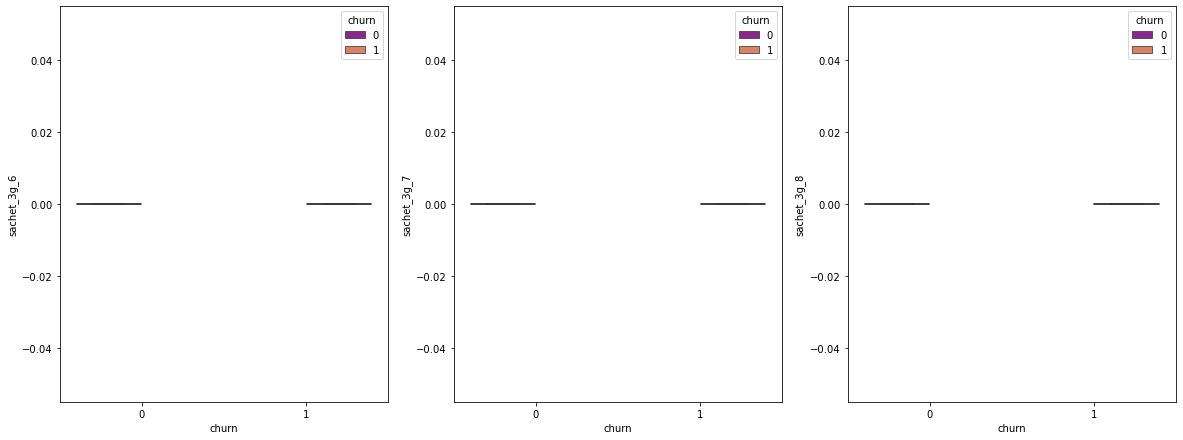

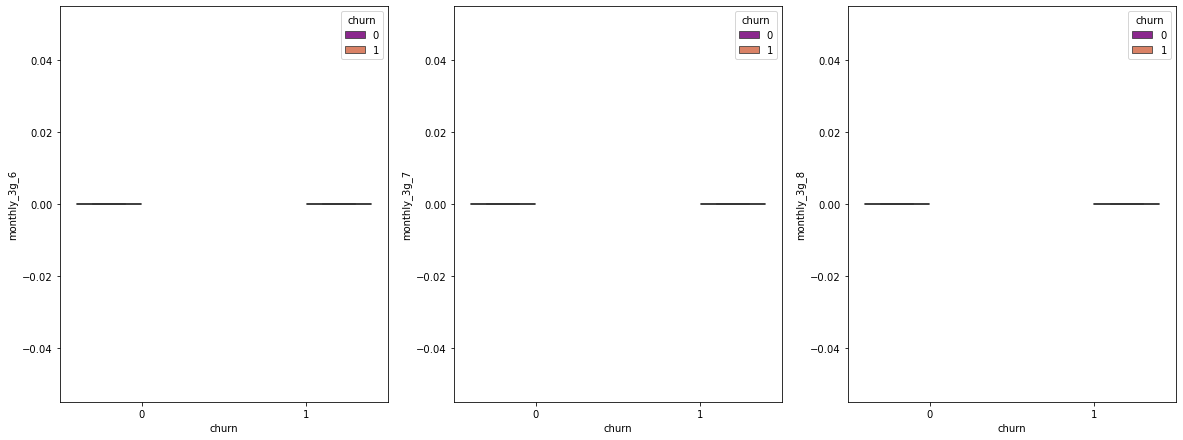

In [34]:
# Box plots for other columns related to data usage and local incoming/outgoing calls
lst_misc_amt_cols = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_t2t_mou','count_rech_2g','vol_2g_mb','vol_3g_mb','sachet_2g','sachet_3g','monthly_3g']

for col in lst_misc_amt_cols:
    plot_box_chart(col)

##### Inference: We clearly see that the 'Churn' customers stop spending for various services in the 8th month, i.e. 'Action Phase'.

In [35]:
# For few of the columns, the values are quite low and hence the box plot does not show any significant trend.
# Let's plot their 'means' instaed.
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

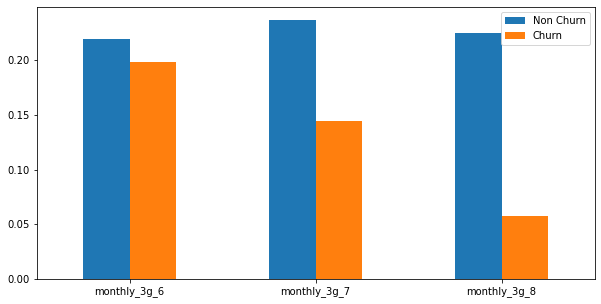

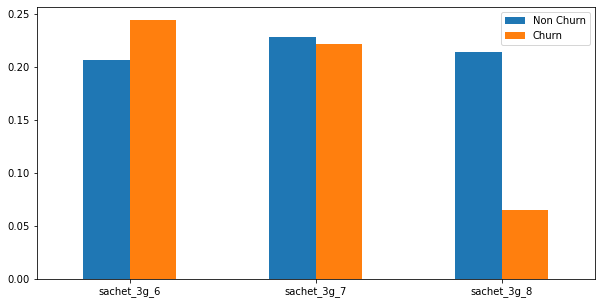

,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.206577,0.228307,0.214571
Churn,0.244554,0.221948,0.065351


In [36]:
plot_mean_bar_chart(telecom_churn_high_val_cust_df, ['monthly_3g_6','monthly_3g_7','monthly_3g_8'])
plot_mean_bar_chart(telecom_churn_high_val_cust_df, ['sachet_3g_6','sachet_3g_7','sachet_3g_8'])

##### Even here, the 'Action Phase' month shows a great decline, all pointing to the observation that these customers are bound to churn in the 'Churn Phase'.

##### Let's also analyze 'minutes of usage' columns and check for any correlations between them.

In [37]:
mou_cols = telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('mou')]
display(mou_cols)

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [38]:
# Let's analyze the mou_og columns for 6th months and check them for any correlation between them
mou_og__cols_6 = telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('.*_og_.*mou_6',regex=True)]

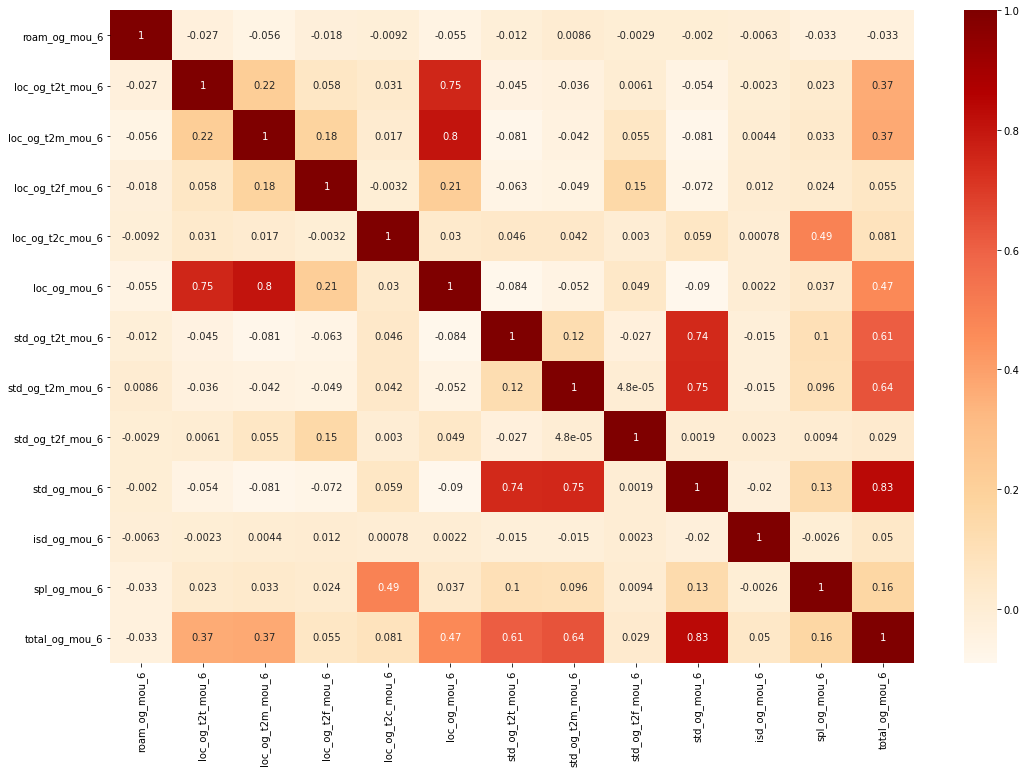

In [39]:
heatmap(18,12,telecom_churn_high_val_cust_df.filter(mou_og__cols_6))

In [40]:
# Similar check for ic_og columns
# Let's analyze the mou_og columns for 6th months and check them for any correlation between them
mou_ic_cols_6 = telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('.*_ic_.*mou_6',regex=True)]

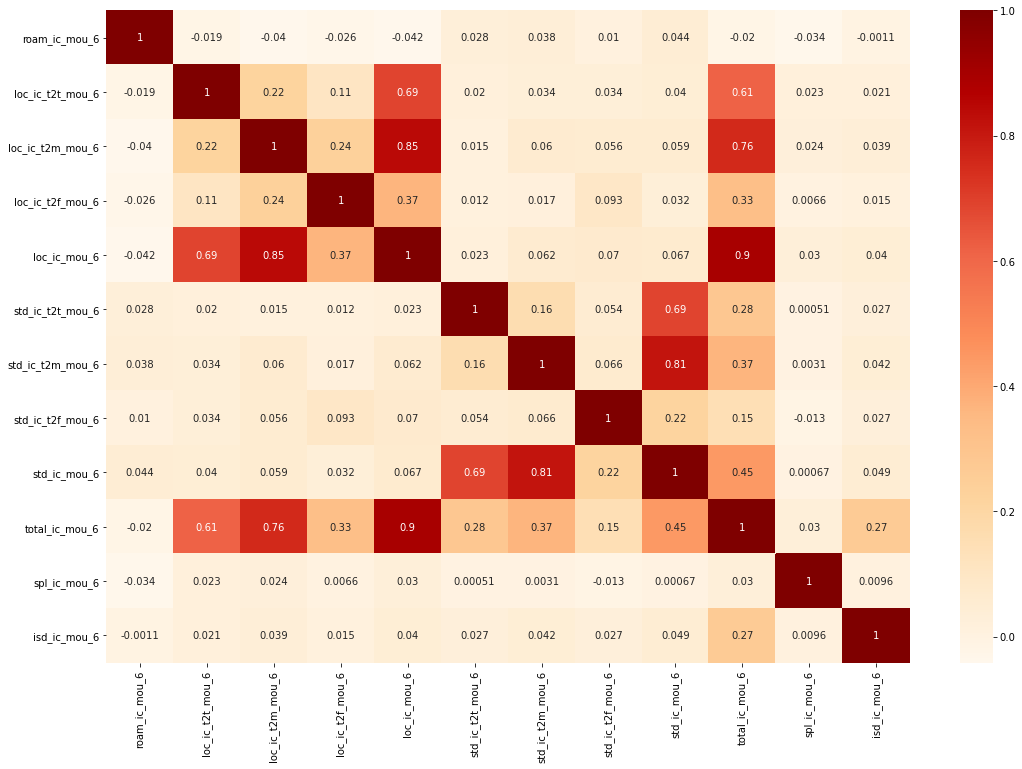

In [41]:
heatmap(18,12,telecom_churn_high_val_cust_df.filter(mou_ic_cols_6))

##### We see a lot of columns show a high correlation. We are going to use PCA to overcome this without dropping columns and see if it improves the model. But that comes later. For now, let's do some EDA for Tenure column.

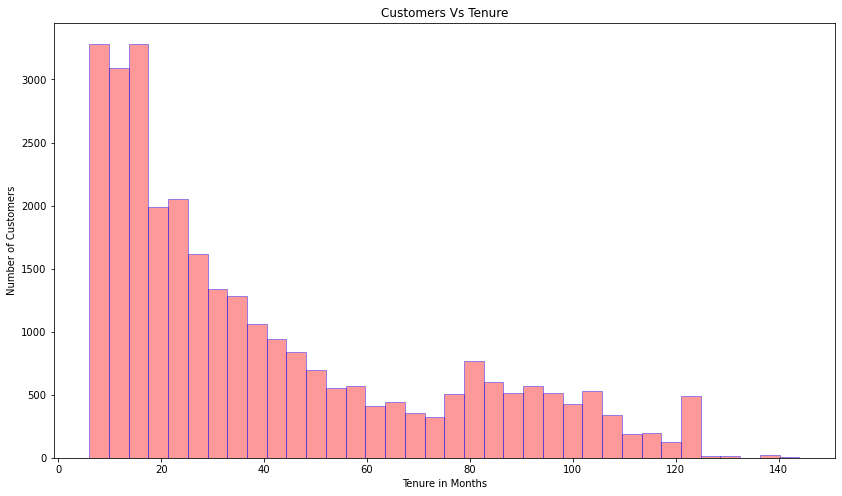

In [42]:
tenure_data = telecom_churn_high_val_cust_df.copy()
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

##### The number of customers using the network sees a significant drop post the 20th month. This needs to be analyzed for the second goal, i.e. how to retian the customers. Let's do some more EDA on this.

In [43]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tenure_range, labels=tenure_label)
tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

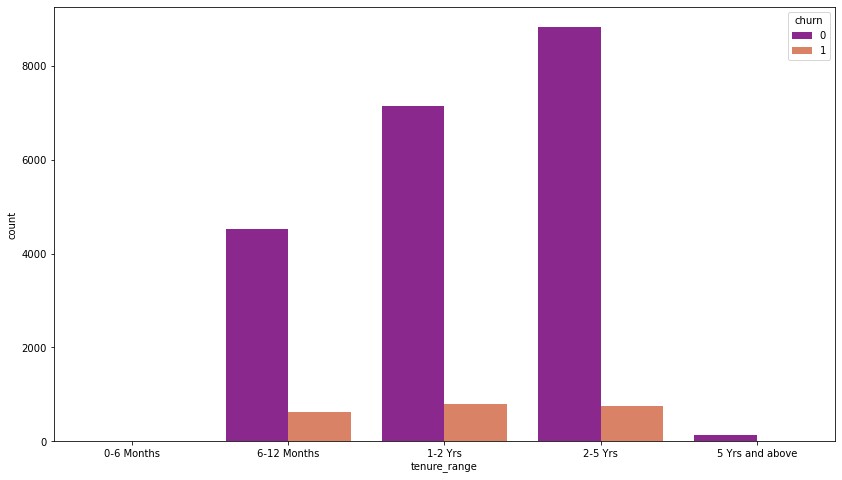

In [44]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

##### In general, very few people stay past the 5th year, meaning the non-churners turn into churners past the 5th year, these are the type of customers who need to be paid more attention to and should be retianed by offering special discounts/internet packs etc.

##### Columns that are summation of other columns in the same dataset.
Upon studying the dataset, we see that there are few columns like total_og_mou, std_og_mou, loc_og_mou which are nothing but summation of other columns in the following manner:
1. total_og_mou_6 = SUM('loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6').

2. std_og_mou_6 = SUM('std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6').

3. loc_og_mou_6 = SUM('loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6').

Let's do some math to prove this as follows.

In [45]:
print(telecom_churn_high_val_cust_df.loc[8,'total_og_mou_6'],"-->",telecom_churn_high_val_cust_df.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(telecom_churn_high_val_cust_df.loc[8,'std_og_mou_6'],"-->",telecom_churn_high_val_cust_df.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())
print(telecom_churn_high_val_cust_df.loc[8,'loc_og_mou_6'],"-->",telecom_churn_high_val_cust_df.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6']].sum())

508.36 --> 508.34999999999997
130.26 --> 130.25
378.09 --> 378.09


##### We can safely remove the columns sounding like ('total_og_mou', 'std_og_mou', 'loc_og_mou') from the dataframe.

In [46]:
list_total_og_cols = telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecom_churn_high_val_cust_df.drop(list_total_og_cols,axis=1,inplace=True)
print("List of columns dropped:")
list_total_og_cols.tolist()

List of columns dropped:


['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [47]:
telecom_churn_high_val_cust_df.shape

(29953, 142)

##### Let's do a similar analysis for incoming columns like 'total_ic', 'loc_ic', 'std_ic_mou'.

In [48]:
print(telecom_churn_high_val_cust_df.loc[21,'total_ic_mou_6'],"-->",telecom_churn_high_val_cust_df.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(telecom_churn_high_val_cust_df.loc[21,'loc_ic_mou_6'],"-->",telecom_churn_high_val_cust_df.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(telecom_churn_high_val_cust_df.loc[21,'std_ic_mou_6'],"--",telecom_churn_high_val_cust_df.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

207.09 --> 207.09
125.33 --> 125.32000000000001
81.76 -- 81.75


##### We can safely remove these columns as well.

In [49]:
list_total_ic_cols = telecom_churn_high_val_cust_df.columns[telecom_churn_high_val_cust_df.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_churn_high_val_cust_df.drop(list_total_ic_cols,axis=1,inplace=True)
print("List of columns dropped:")
list_total_ic_cols.tolist()

List of columns dropped:


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [50]:
telecom_churn_high_val_cust_df.shape

(29953, 133)

In [51]:
# Let's drop the column 'total_avg_rech_amt_6_7' which was added as summation of columns
# 'total_rech_amt_6', 'total_rech_amt_data_6', 'total_rech_amt_7' &'total_rech_amt_data_7' for percentile analysis.
telecom_churn_high_val_cust_df.drop(['total_avg_rech_amt_6_7'],axis=1,inplace=True)
telecom_churn_high_val_cust_df.shape

(29953, 132)

In [52]:
# Let's create a copy of the dataframe for modelling purpose.
telecom_churn_model_df = telecom_churn_high_val_cust_df.copy()
telecom_churn_model_df.shape

(29953, 132)

## Step 3: Data Modeling

#### Let's start with PCA to arrive at optimal number of columns that we would use with various modeling technoques.

In [53]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [54]:
# Putting feature variable to X
X = telecom_churn_high_val_cust_df.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_churn_high_val_cust_df['churn']

In [55]:
telecom_churn_high_val_cust_df.nunique()

arpu_6                   29029
arpu_7                   29040
arpu_8                   28035
onnet_mou_6              16872
onnet_mou_7              16973
onnet_mou_8              15854
offnet_mou_6             21198
offnet_mou_7             21233
offnet_mou_8             20140
roam_ic_mou_6             4045
roam_ic_mou_7             3381
roam_ic_mou_8             3431
roam_og_mou_6             4742
roam_og_mou_7             3988
roam_og_mou_8             3996
loc_og_t2t_mou_6         10416
loc_og_t2t_mou_7         10388
loc_og_t2t_mou_8         10056
loc_og_t2m_mou_6         15607
loc_og_t2m_mou_7         15659
loc_og_t2m_mou_8         15118
loc_og_t2f_mou_6          3089
loc_og_t2f_mou_7          3097
loc_og_t2f_mou_8          2988
loc_og_t2c_mou_6          1682
loc_og_t2c_mou_7          1763
loc_og_t2c_mou_8          1720
std_og_t2t_mou_6         11085
std_og_t2t_mou_7         11238
std_og_t2t_mou_8         10243
std_og_t2m_mou_6         12857
std_og_t2m_mou_7         12872
std_og_t

In [56]:
# Categorical Columns.
# Assuming any column with fewer than 20 values to be a categorical column (and not the target column of course).
cat_cols   = list(X.columns[X.nunique() < 20])
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [57]:
# Numerical Columns.
# Columns which are neither categorical nor Id or target_col.
num_cols   = [x for x in X.columns if x not in cat_cols ]
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA


def split_X_Y(df):
    Y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

In [59]:
# Apply some standard scaling
X_scaled = scale_data(X)
X_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,-0.784261,-0.721520,-0.587674,-0.567366,-0.558098,-0.510841,-0.774388,-0.757784,-0.695309,-0.211205,-0.166765,-0.168679,-0.228739,-0.209660,-0.189787,-0.369385,-0.356309,-0.343476,-0.652678,-0.674810,-0.649478,-0.286747,-0.292688,-0.301900,-0.250059,-0.206567,-0.238110,-0.410655,-0.413745,-0.373493,-0.438580,-0.433291,-0.384626,-0.150667,-0.140750,-0.145041,-0.047398,-0.046270,-0.043625,-0.331367,-0.326467,-0.322777,-0.160927,-0.016037,-0.01739,-0.399804,-0.398086,-0.393039,-0.686101,-0.694768,-0.661296,-0.333993,-0.326141,-0.306103,-0.191602,-0.185703,-0.194993,-0.297244,-0.291703,-0.270094,-0.141193,-0.143467,-0.128812,-0.324508,-0.108621,-0.239999,-0.140659,-0.148219,-0.155900,-0.082535,-0.093808,-0.095845,-0.832975,-0.924758,-0.859812,-0.532902,-0.701743,-0.544124,0.471169,0.439217,0.529591,1.050410,1.075345,1.098537,-0.236384,-0.276660,-0.207844,1.541723,1.505546,1.622450,-0.49602,-0.512728,-0.476359,0.489692,0.422819,0.459036,0.604806,0.541668,0.663408,-0.291811,-0.373432,-0.319829,-0.285554,-0.239923,-0.263422,-0.117368,-0.112598,-0.107311,-0.401076,-0.406668,-0.377738,-0.425474,-0.443971,-0.416099,1.274319,1.168409,1.276531,-0.212554,-0.208848,-0.183926,0.964925,0.952485,1.046449,-0.252008,-0.329779,-0.403511,-0.137972,-0.085053,-0.143966,-0.187505,-0.130336
1,1.107406,1.643033,5.302613,-0.441585,-0.444251,-0.396856,0.164965,0.378512,-0.019115,0.001388,0.274868,0.257863,-0.024563,-0.078695,0.173388,-0.144935,-0.225938,-0.166450,0.580783,1.176321,0.044793,2.519590,2.218605,2.425615,-0.250059,-0.206567,-0.238110,-0.400011,-0.358485,-0.343304,-0.316641,-0.360077,-0.264487,0.404860,1.405035,1.379645,-0.047398,-0.042321,0.180077,-0.075379,-0.326467,-0.002416,-0.160927,-0.016037,-0.01739,-0.044973,-0.205510,-0.222309,0.305884,0.319548,-0.116813,2.989403,1.736017,0.579561,0.282874,-0.043353,0.230718,0.633181,0.909898,1.097095,2.589202,1.609785,0.986581,0.791798,-0.108621,-0.239999,-0.113832,0.032861,0.291204,1.042006,0.855019,1.087598,-0.726915,-0.712770,-0.320785,1.636996,0.221488,4.993406,8.041620,3.403384,8.192

In [60]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
X.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295,84.574122,85.762835,78.153334,163.309546,163.087606,151.810056,6.348347,6.426493,5.891865,1.577380,1.888737,1.701889,165.897941,174.378166,148.587258,179.439168,187.961923,157.3229

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, train_size=0.7, random_state=1)

### Only 8% of data set is churned showing a high class imbalance. So handling class imbalance using SMOTE.

In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 1703
Before OverSampling, counts of label '0': 19264 

After OverSampling, the shape of train_X: (38528, 131)
After OverSampling, the shape of train_y: (38528,) 

After OverSampling, counts of label '1': 19264
After OverSampling, counts of label '0': 19264


#### We see that SMOTE helped in settling the imbalance between Churn & Not Churn lables. That is what SMOTE does.
Reference article: https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/.

We shall be using the datasets obtained after SMOTE for doing PCA.

In [63]:
# get X_train_res columns and target_col
list_cols_X = list(X_train_res.columns)
target_col = ["churn"]

In [64]:
df_X_train_res = pd.DataFrame(data=X_train_res, columns = list_cols_X)
df_X_test_res = pd.DataFrame(data=X_test, columns = list_cols_X)

In [65]:
df_y_train_res = pd.DataFrame(data=y_train_res, columns = target_col)
df_y_test_res = pd.DataFrame(data=y_test, columns = target_col)

#### Let's start with PCA.

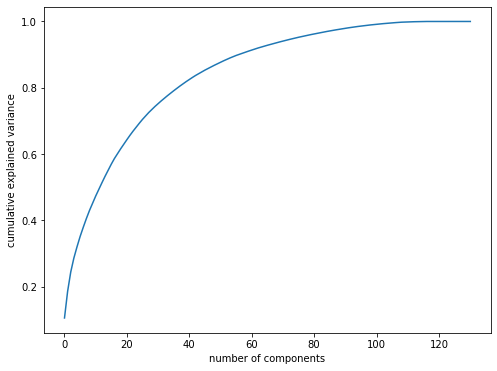

In [66]:
# Let's get the scree plot
pca = get_scree_plot(X_scaled)

In [67]:
a = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# to find out number of features required to explain for 95% variance
num_of_pca_features = np.argmax(a>95)
print(num_of_pca_features)

74


#### We see at number_of_features = 74 we get a minimum of 95% of variance explained. Let's use this value for our analysis.

In [68]:
from sklearn.model_selection import train_test_split

def perform_pca(X,X_test,feature_number,train_size=0.7,test_size=0.3) :
    
    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(X)
    x_test_pca = pca.transform(X_test)
    

    return x_tr_pca,x_test_pca

In [69]:
X_train_pca, X_test_pca  = perform_pca(X_train_res,X_test,num_of_pca_features)

In [70]:
# the train & test for y's will still be the same
y_train_pca = y_train_res
y_test_pca = y_test

#### We cannot not use PCA derived components to do feature selection. Hence, we shall use two parallel approaches to get our desired results, namely: Prediction of the Churners (using PCA dataset) and Feature Selection for Churning (without PCA dataset, i.e. with SMOTE dataset).

Ref article: https://towardsdatascience.com/pca-is-not-feature-selection-3344fb764ae6

#### Also, from the given problem statement, we know that onboarding a new customer is very costly as compared to retaining the existing ones. In terms of Precision/Recall, this means that the cost of False Negatives (someone predicted as not going to churn but actually he/she churns) is very high. In other words, we are here looking for a model with high Recall value of predicting the 'Churn' and with high Accuracy.

#### Let's use the above datasets for our modeling. We are going to deploy a battery of techinques using PCA and Non-PCA datasets listed below:

#### PCA Models for predicting churn:
1. Logistic Regression (Baseline Model).
2. KNN Classifier.
3. Gaussian Naive Bayes.


#### Non PCA Models using original datasets for Feature Selection:
1. Recursive Feature Elimination.
2. Decision Tree Visualization.
3. Random Forest Classifier.
3. LightGBM Classifier.
4. XGBoost Classifier.

Please note, we dropped the idea of including SVC-Linear & SVC-RBF Models in the final submission as they both were computationally too costly and took an average of 1 hour to finish.

Similarly, the hyperparameter tuning using GridSearchCV with XGBoostClassifier too was computationally very costly and lasted 2.5 hours without providing much improvment to the final model, hence dropping it in the final submission.

Once we are done with all of the above, we will compare the models for their accuracy, recall and other features.

##### Let's declare the methods that we are going to use for the above PCA & Non-PCA models.

##### Method for Modeling using PCA datasets for Churn prediction.

In [71]:
# Flag for displaying the discrimination threshold plot
show_threshold = True

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [73]:
def telecom_churn_prediction(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    # let's get the algorithm name 
    splitChar = '('
    
    algoName = str(algorithm).partition(splitChar)[0]
    print ("\nAlgorithm Summary : \n")
    print (algorithm)
    
    print ("\nClassification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area Under Curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
     #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not Churn","Churn"],
                        y = ["Not Churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
   
    #subplots
    fig = sub_plots.make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion Matrix',
                                            'Receiver Operating Characteristic'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)

    
    fig['layout'].update(showlegend=False, title="Model Performance: " + algoName,
                         autosize = False,height = 600,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "False Positive Rate"))
    fig["layout"]["yaxis2"].update(dict(title = "True Positive Rate"))
    
    py.iplot(fig)
  
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

##### Method for Modeling for Feature Selection.

In [74]:
def telecom_churn_feature_selection(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,mode,threshold_plot) :
    
    # let's get the algorithm name 
    splitChar = '('
    
    algoName = str(algorithm).partition(splitChar)[0]
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    
    
    #coeffs
    if   mode == "Coefficient" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif mode == "Feature" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
  
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print ("\n" + mode + " Summary : \n")
    print(coef_sumry.head(10))
 
    print ("\nAlgorithm Summary : \n")
    print (algorithm)
    
    print ("\nClassification Report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area Under Curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not Churn","Churn"],
                        y = ["Not Churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = sub_plots.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver Operating Characteristic',
                                            mode + ' Importance'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model Performance: " + algoName,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "False Positive Rate"))
    fig["layout"]["yaxis2"].update(dict(title = "True Positive Rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

#### 1. Logistic Regression (Baseline Model).

Let's do the LR with original datasets and then let's use the datasets obtained after PCA to see the difference.


Algorithm Summary : 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8256
           1       0.69      0.32      0.43       730

    accuracy                           0.93      8986
   macro avg       0.81      0.65      0.70      8986
weighted avg       0.92      0.93      0.92      8986

Accuracy Score   :  0.9326730469619408
Area Under Curve :  0.6511752349474355


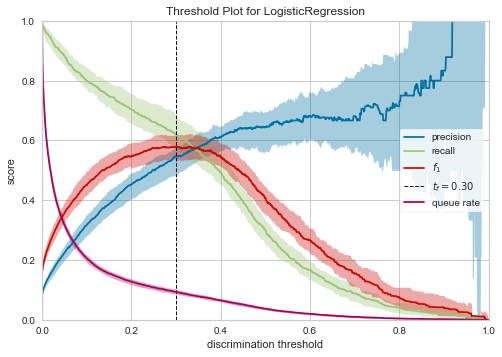

In [75]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit, X_train, X_test, y_train, y_test, threshold_plot=show_threshold)


Algorithm Summary : 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8256
           1       0.30      0.80      0.43       730

    accuracy                           0.83      8986
   macro avg       0.64      0.81      0.67      8986
weighted avg       0.92      0.83      0.86      8986

Accuracy Score   :  0.8296238593367461
Area Under Curve :  0.8148728695444409


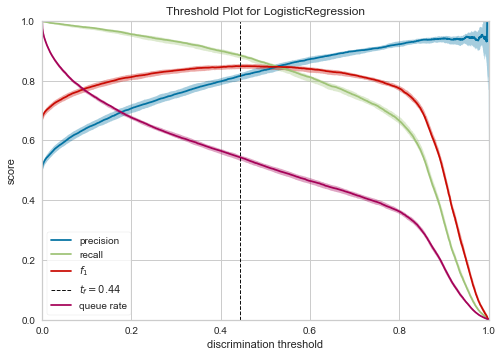

In [76]:
# Now let's use the datasets obtained after PCA and see the difference.
telecom_churn_prediction(logit, X_train_pca, X_test_pca, y_train_pca, y_test_pca, threshold_plot=show_threshold)

#### We see a whopping increase in Recall value for Churn (from 0.32 to 0.80). Other values like Precision & f1 score too have increased. That's the impact SMOTE has on an unbalanced dataset. This concludes that using PCA indeed helps us in handling multidimensionality and prediction. Lets continue using the PCA dastasets with few more Modeling Techniques to arrive at the best one. 

#### 2. KNN Classifier.


Algorithm Summary : 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.80      0.87      8256
           1       0.24      0.71      0.35       730

    accuracy                           0.79      8986
   macro avg       0.60      0.75      0.61      8986
weighted avg       0.91      0.79      0.83      8986

Accuracy Score   :  0.7892276875139105
Area Under Curve :  0.7548023189444621


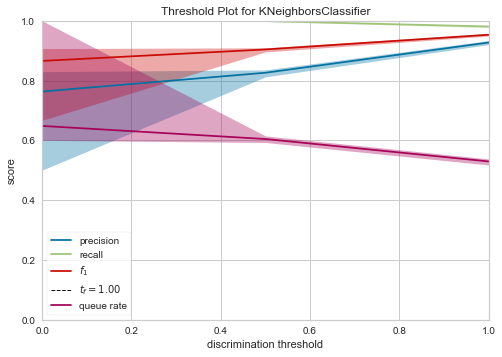

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

telecom_churn_prediction(knn,X_train_pca, X_test_pca, y_train_pca, y_test_pca, threshold_plot=show_threshold)

#### 3. Gaussian Naive Bayes.


Algorithm Summary : 

GaussianNB(priors=None, var_smoothing=1e-09)

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.35      0.51      8256
           1       0.09      0.75      0.16       730

    accuracy                           0.38      8986
   macro avg       0.52      0.55      0.34      8986
weighted avg       0.87      0.38      0.48      8986

Accuracy Score   :  0.38014689517026484
Area Under Curve :  0.5502830652012318


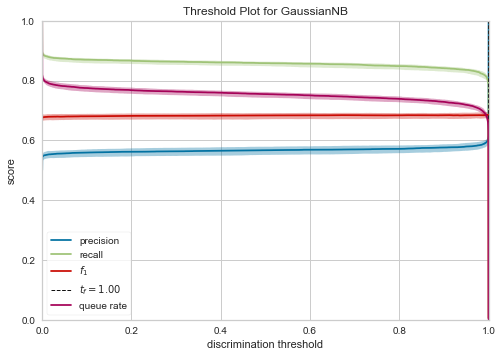

In [78]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction(gnb,X_train_pca,X_test_pca,y_train_pca,y_test_pca, threshold_plot=show_threshold)

### Modeling for Feature Selection.

#### 1. Recursive Feature Elimination.


Coefficient Summary : 

    coefficients          features
3       1.291076       onnet_mou_7
14      0.897997  loc_ic_t2m_mou_7
1       0.293287            arpu_7
26      0.259491       sachet_3g_7
2       0.250010            arpu_8
0       0.218473            arpu_6
12      0.206791  loc_ic_t2t_mou_7
24     -0.197517      monthly_2g_7
18     -0.211682      spl_ic_mou_7
9      -0.223376  std_og_t2f_mou_8

Algorithm Summary : 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.82      0.90      8256
           1       0.29      0.80      0.42       730

    accuracy                           0.82      8986
   macro avg   

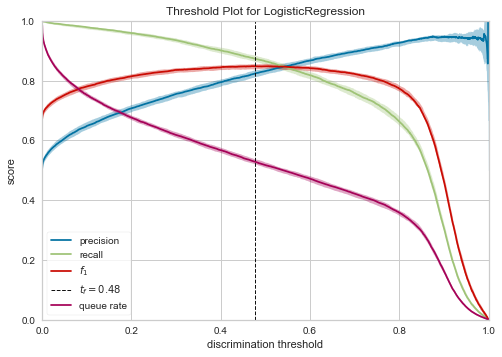

In [79]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,30) # doing it with 30 features
rfe = rfe.fit(X_train_res,y_train_res.values.ravel())

rfe.support_
rfe.ranking_


#identified columns after Recursive Feature Elimination
cols = X_train_res.columns[rfe.support_]


#separating train and test data
X_train_rfe = X_train_res[cols]
X_test_rfe  = X_test[cols]
y_train_rfe = y_train_res
y_test_rfe  = y_test

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#applying model
telecom_churn_feature_selection(logit_rfe,X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe,cols,"Coefficient",threshold_plot = show_threshold)

#let's display the support columns in a table
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : X_train_res.columns,
                       "ranking" : rfe.ranking_,
                      })

tab_rk = ff.create_table(idc_rfe[idc_rfe["rfe_support"] == True])
py.iplot(tab_rk)

#### Before we proceed with Decision Tree and Random Forest, let's first do some hyperparameter tuning so that we use the best estimator while we perform modeling.

## Hyperparameter Tuning.

#### We are deploying GridSearchCV to get us the best classifiers. It internally takes care of criteria like Gini & Entropy.

In [80]:
from sklearn.model_selection import KFold,GridSearchCV

def perform_gridsearch(n_folds, name, X_train, y_train):
    
    # Create the parameter grid 
    param_grid_DT = {
        'max_depth': range(5, 15, 5),
        'min_samples_leaf': range(50, 150, 50),
        'min_samples_split': range(50, 150, 50)
    }
    
    param_grid_RF = {
        'max_depth': [4,8,10],
        'min_samples_leaf': range(50, 200, 50),
        'min_samples_split': range(100, 300, 200),
        'n_estimators': [100,200, 300], 
        'max_features': [5, 10]
    }
    
    if name == "Decision Tree":
        clf = DecisionTreeClassifier(random_state=0)
        grid_search = GridSearchCV(clf, param_grid=param_grid_DT, cv = n_folds)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_
    elif name == "Random Forest":
        clf = RandomForestClassifier(random_state=0)
        grid_search = GridSearchCV(clf, param_grid=param_grid_RF, cv = n_folds)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_

    return best_clf

#### 2. Decision Tree Visualization.

##### Univariate Feature Selection using f_classif Method.

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# number of features
num_features = 12

#dataframe with non negative values
df_x = pd.DataFrame(data = X_train_res,columns=list_cols_X)
df_y = pd.DataFrame(data = y_train_res,columns=target_col)

#fit model with k= num_features
select = SelectKBest(score_func = f_classif,k = num_features)
fit    = select.fit(df_x,df_y)

#Summarize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":list_cols_X,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending = False)

# "feature_type" column for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

scores
[1.97423433e+02 2.09537108e+02 5.62208661e+03 3.66775930e+02
 2.37828378e+00 1.52928531e+03 2.17088962e+02 5.58512626e+00
 3.21112693e+03 1.16449810e+02 2.50977701e+02 2.04388969e+02
 2.36459550e+02 5.46259282e+02 3.33533563e+02 3.93028117e+02
 6.33615033e+02 1.62435309e+03 7.45245308e+02 1.70429114e+03
 5.35905461e+03 1.75819950e+02 3.45766024e+02 1.31951441e+03
 2.55518179e+01 3.54333572e+00 3.05432576e+02 7.18828299e+02
 1.10898643e+02 7.14662802e+02 7.54416295e+02 1.79064148e+02
 8.14586603e+02 4.47677857e+01 7.99748563e+01 2.80413393e+02
 2.06213463e+01 3.15911821e-01 1.66957702e+01 3.34237306e+00
 2.19308208e+01 9.59506708e+02 3.56152783e-01 7.20788578e+00
 2.45651910e+00 3.51344456e+02 8.67663839e+02 2.15292715e+03
 8.55986139e+02 1.90328343e+03 6.56926205e+03 6.44117271e+02
 8.41794178e+02 1.66413322e+03 1.57938669e+01 8.60248460e+00
 3.71119565e+02 6.15999788e-01 1.05159603e+02 6.18157859e+02
 8.53714714e+01 1.08164012e+02 2.14595176e+02 1.63757974e+01
 3.15445534e+01 5

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display


#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(model_performance = None) :
    
    #separating dependent and independent variables
    dtc_X_train = df_X_train_res
    dtc_y_train = df_y_train_res
    
    dtc_X_test = df_X_test_res
    dtc_y_test = df_y_test_res
    
    # get the best Decision Tree Estimator by doing a 5 fold GridSearch
    best_clf = perform_gridsearch(5, "Decision Tree", dtc_X_train,dtc_y_train)
    
    tree_data = tree.export_graphviz(best_clf,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = df_X_train_res.columns, 
                                        precision  = 2,
                                        class_names=["Not Churn","Churn"],
                                        filled = True)                      
    
    #plot decision tree
    graph = Source(tree_data)
 
    
    #model performance
    if model_performance == True :
        telecom_churn_feature_selection(best_clf,
                                 dtc_X_train,dtc_X_test,
                                 dtc_y_train,dtc_y_test,
                                 df_X_train_res.columns,"Feature",threshold_plot = show_threshold)
    display(graph)
    return best_clf


Feature Summary : 

     coefficients            features
50       0.426697    loc_ic_t2m_mou_8
122      0.127326           fb_user_8
14       0.116776       roam_og_mou_8
83       0.037535  last_day_rch_amt_8
11       0.036971       roam_ic_mou_8
86       0.033805   total_rech_data_8
77       0.033398    total_rech_amt_8
2        0.029085              arpu_8
74       0.011147    total_rech_num_8
32       0.008409    std_og_t2m_mou_8

Algorithm Summary : 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.9

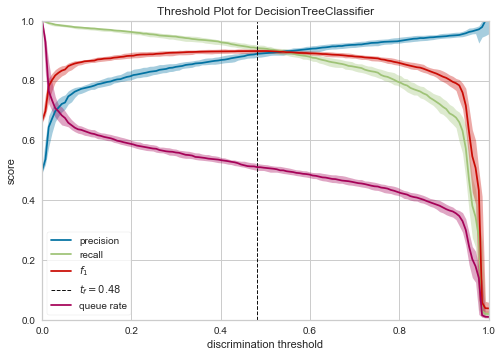

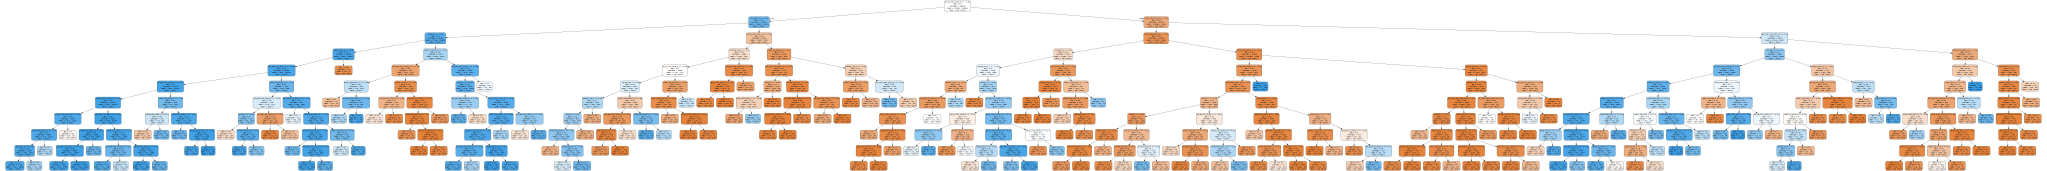

In [83]:
# Run the model for Decision Tree
best_dt = plot_decision_tree(model_performance= True)

#### 3. Random Forest Classifier.

In [84]:
from sklearn.ensemble import RandomForestClassifier
#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plot_tree_randomforest(model_performance = None) :
    
    # perform 5 fold grid search to find the best random forest
    best_clf = perform_gridsearch(5, "Random Forest", X_train_res,y_train_res)
    
    #plotting just first dt in the best random forest obtained from grid search.
    graph = Source(tree.export_graphviz(best_clf.estimators_[0],out_file=None,
                                    rounded=True,proportion = False,
                            feature_names = list_cols_X, 
                            precision  = 2,
                            class_names=["Not Churn","Churn"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        telecom_churn_feature_selection(best_clf,X_train_res,X_test,y_train_res,y_test,list_cols_X,"Feature",threshold_plot = show_threshold)
    return best_clf

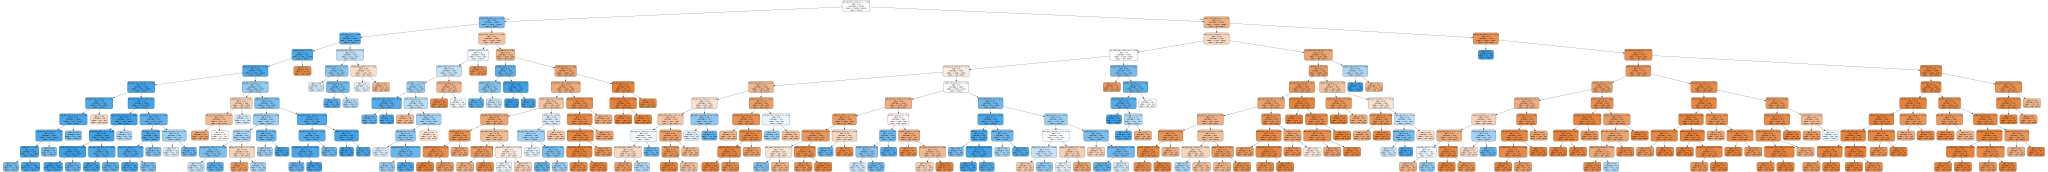


Feature Summary : 

     coefficients            features
50       0.075962    loc_ic_t2m_mou_8
77       0.065931    total_rech_amt_8
14       0.060950       roam_og_mou_8
11       0.060489       roam_ic_mou_8
2        0.056086              arpu_8
20       0.055843    loc_og_t2m_mou_8
83       0.049295  last_day_rch_amt_8
47       0.048270    loc_ic_t2t_mou_8
122      0.042707           fb_user_8
80       0.035557      max_rech_amt_8

Algorithm Summary : 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=Fals

In [ ]:
best_rf = plot_tree_randomforest(True)

#### 4. LGBM Classifier.

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)


telecom_churn_feature_selection(lgbm_c,X_train_res,X_test,y_train_res,y_test,list_cols_X,"Feature",threshold_plot = show_threshold)

#### 5. XGBoost Classifier.

In [ ]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

telecom_churn_feature_selection(xgc,X_train_res,X_test,y_train_res,y_test,list_cols_X,"Feature",threshold_plot = show_threshold)

## Step 4: Model Comparison.
#### Here, we shall compare the PCA Models & Non-PCA Models for their Accuracy, Precision, Recall, f1 score, AUC, Precision-Recall graphs & Feature Selection.
#### We shall first cover the PCA Models.

##### Let's first declare generic methods going to be used for the task at hand.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get Model Report containing Accuracy, Recall, Precision, f1 score, AUC & Kappa_metric in a dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

# Plot Model Comparison Matrices
def get_model_performances_tabular_output(model_performances):
    table  = ff.create_table(np.round(model_performances,4))
    table.layout.width=1700 # done to accommodate large Model names
    py.iplot(table)

# Compare Model Performances.
def output_tracer(metric,color,model_performances) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model Performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Score",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

# Plot Model Performance Matrices.
def plot_performance_matrices(model_performances):
    trace1  = output_tracer("Accuracy_score","#6699FF",model_performances)
    trace2  = output_tracer('Recall_score',"red",model_performances)
    trace3  = output_tracer('Precision',"#33CC99",model_performances)
    trace4  = output_tracer('f1_score',"lightgrey",model_performances)
    trace5  = output_tracer('Kappa_metric',"#FFCC99",model_performances)

    data = [trace1,trace2,trace3,trace4,trace5]
    fig = go.Figure(data=data,layout=layout)
    fig.update_layout(
    title={
        'text': "Model Performance Scores",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
    py.iplot(fig)


# Plot Confusion Matrices for Models
def plot_confusion_matrices(list_of_models, count_of_models, model_headings, X_test, y_test):

    fig = plt.figure(figsize=(13,15))
    fig.set_facecolor("#838B8B")
    fig.suptitle('Model Confusion Matrices', fontsize=15)
    
    for i,j,k in itertools.zip_longest(list_of_models,range(count_of_models),model_headings) :
        plt.subplot(4,3,j+1)
        predictions = i.predict(X_test)
        conf_matrix = confusion_matrix(predictions,y_test)
        sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                    xticklabels=["Not Churn","Churn"],
                    yticklabels=["Not Churn","Churn"],
                    linewidths = 2,linecolor = "w",cmap = "Set1")
        plt.title(k,color = "w")
        plt.subplots_adjust(wspace = .3,hspace = .3)

# Plot ROC Curves for Models
def plot_roc_curves(list_of_models, count_of_models, model_headings, X_test, y_test):

    plt.style.use("dark_background")
    fig = plt.figure(figsize=(12,16))
    fig.set_facecolor("#838B8B")
    fig.suptitle('Model AUC-ROC Curves', fontsize=15)

    for i,j,k in itertools.zip_longest(list_of_models,range(count_of_models),model_headings) :
        
        qx = plt.subplot(4,3,j+1)

        predictions = i.predict(X_test)
        probabilities = i.predict_proba(X_test)
        fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
        plt.plot(fpr,tpr,linestyle = "dotted",
                 color = "royalblue",linewidth = 2,
                 label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
        plt.plot([0,1],[0,1],linestyle = "dashed",
                 color = "orangered",linewidth = 1.5)
        plt.fill_between(fpr,tpr,alpha = .4)
        plt.fill_between([0,1],[0,1],color = "k")
        plt.legend(loc = "lower right",
                   prop = {"size" : 12})
        qx.set_facecolor("k")
        plt.grid(True,alpha = .15)
        plt.title(k,color = "w")
        plt.xticks(np.arange(0,1,.3))
        plt.yticks(np.arange(0,1,.3))
        
# Plot Precision-Recall Curves for Models
def plot_precision_recall_curves(list_of_models, count_of_models, model_headings, X_test, y_test):

    fig = plt.figure(figsize=(13,17))
    fig.set_facecolor("#838B8B")
    fig.suptitle('Model Precision Recall Curves', fontsize=15)

    for i,j,k in itertools.zip_longest(list_of_models,range(count_of_models),model_headings) :

        qx = plt.subplot(4,3,j+1)
        predictions = i.predict(X_test)
        probabilities = i.predict_proba(X_test)
        recall,precision,thresholds = precision_recall_curve(y_test,probabilities[:,1])
        plt.plot(recall,precision,linewidth = 1.5,
                 label = ("avg_pcn : " + 
                          str(np.around(average_precision_score(y_test,predictions),3))))
        plt.plot([0,1],[0,0],linestyle = "dashed")
        plt.fill_between(recall,precision,alpha = .2)
        plt.legend(loc = "lower left",
                   prop = {"size" : 10})
        qx.set_facecolor("k")
        plt.grid(True,alpha = .15)
        plt.title(k,color = "w")
        plt.xlabel("Recall",fontsize =7)
        plt.ylabel("Precision",fontsize =7)
        plt.xlim([0.25,1])
        plt.yticks(np.arange(0,1,.3))
        


#### Let's start the plotting the performances. We shall start with first getting the PCA & Non-PCA models in dataframes.

In [ ]:
# Models for Prediction using PCA Datasets.
model_logit = model_report(logit,X_train_pca,X_test_pca,y_train_pca,y_test_pca,
                           "Logistic Regression(Baseline Model)") 

model_knn = model_report(knn,X_train_pca,X_test_pca,y_train_pca,y_test_pca,"KNN Classifier") 

model_gnb = model_report(gnb,X_train_pca,X_test_pca,y_train_pca,y_test_pca,"Naive Bayes") 

#concat all models
model_performances_churn_prediction = pd.concat([model_logit,model_knn,model_gnb],axis = 0).reset_index()

model_performances_churn_prediction = model_performances_churn_prediction.drop(columns = "index",axis =1)

In [ ]:
# Models for Feature Selection using Non-PCA Datasets.
model_logit_rfe = model_report(logit_rfe,X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe,
                               "Logistic Regression(RFE)")

model_dtc = model_report(best_dt,X_train_res, X_test, y_train_res, y_test,"Decision Tree Classifier")

model_rfc = model_report(best_rf,X_train_res, X_test, y_train_res, y_test,"Random Forest Classifier") 

model_lgbm = model_report(lgbm_c,X_train_res, X_test, y_train_res, y_test,"LGBM Classifier") 

model_xgc = model_report(xgc,X_train_res, X_test, y_train_res, y_test,"XGBoost Classifier") 

#concat all models
model_performances_feature_selection = pd.concat([model_logit_rfe,model_dtc,model_rfc,model_lgbm,
                                                  model_xgc],axis = 0).reset_index()

model_performances_feature_selection = model_performances_feature_selection.drop(columns = "index",axis =1)

In [ ]:
# Get the Regression Models in lists.
list_of_churn_prediction_models    = [logit,knn,gnb]
list_of_feature_selection_models    = [best_dt,best_rf,lgbm_c,xgc]

# Get the Regression Model Headings in lists.
model_headings_churn_prediction  = ['Logistic Regression(Baseline Model)','KNN Classifier','Naive Bayes']
model_headings_feature_selection  = ['Decision Tree Classifier','Random Forest Classifier','LGBM Classifier','XG Boost Classifier']

# Get the count of Regression Models.
count_of_churn_predictors = len(list_of_churn_prediction_models)
count_of_feature_selectors = len(list_of_feature_selection_models)


### Let's run the show for Churn Prediction Models.

In [ ]:
# Get Model Performances in tabular output.
get_model_performances_tabular_output(model_performances_churn_prediction)

# Plot Model Performance Matrices.
plot_performance_matrices(model_performances_churn_prediction)

# Plot Confusion Matrices for Models.
plot_confusion_matrices(list_of_churn_prediction_models, count_of_churn_predictors, model_headings_churn_prediction,
                        X_test_pca, y_test_pca)

# Plot ROC Curves for Models.
plot_roc_curves(list_of_churn_prediction_models, count_of_churn_predictors, model_headings_churn_prediction,
                        X_test_pca, y_test_pca)

# Plot Precision-Recall Curves for Models.
plot_precision_recall_curves(list_of_churn_prediction_models, count_of_churn_predictors, model_headings_churn_prediction,
                        X_test_pca, y_test_pca)

### Let's run everything for Feature Selection Models.

In [ ]:
# Get Model Performances in tabular output.
get_model_performances_tabular_output(model_performances_feature_selection)

# Plot Model Performance Matrices.
plot_performance_matrices(model_performances_feature_selection)

# Plot Confusion Matrices for Models.
plot_confusion_matrices(list_of_feature_selection_models, count_of_feature_selectors, model_headings_feature_selection,
                        X_test, y_test)

# Plot ROC Curves for Models.
plot_roc_curves(list_of_feature_selection_models, count_of_feature_selectors, model_headings_feature_selection,
                        X_test, y_test)

# Plot Precision-Recall Curves for Models.
plot_precision_recall_curves(list_of_feature_selection_models, count_of_feature_selectors, model_headings_feature_selection,
                        X_test, y_test)

## Step 5: Conclusion.

#### Best Model for Prediction based on Accuracy, Recall, AUC-ROC & Precision-Recall Curves (PCA): Logistic Regression (Baseline Model).

#### Best Model for Feature Selection Based on Accuracy, Recall, AUC-ROC & Precision-Recall Curves (Non-PCA): Random Forest Classifier.

#### Most Important Features based on Random Forest Classifier (in descending order of importance): 
1. loc_ic_t2m_mou_8
2. total_rech_amt_8
3. roam_og_mou_8
4. roam_ic_mou_8
5. arpu_8
6. loc_og_t2m_mou_8
7. last_day_rch_amt_8
8. loc_ic_t2t_mou_8
9. fb_user_8
10. max_rech_amt_8

#### As per Data dictionary:
1. Local Incoming Operator to other Operator Minutes of Usage in the 8th Month (i.e. Aug).
2. Total Recharge Amount in the 8th Month (i.e. Aug).
3. Roaming Outgoing Minutes of Usage in the 8th Month (i.e. Aug).
4. Roaming Incoming Minutes of Usage in the 8th Month (i.e. Aug).
5. Average Revenue per User in the 8th Month (i.e. Aug).
6. Local Outgoing Minutes of Usage to other Operator in the 8th Month (i.e. Aug).
7. Last Day Recharge Amount in the 8th Month (i.e. Aug).
8. Local Incoming Minutes of Usage from same Operator in the 8th Month (i.e. Aug).
9. Service scheme to avail Facebook and similar social networking sites in the 8th Month (i.e. Aug).
10. Maximum Recharge Amount in the 8th Month (i.e. Aug).

#### If we only talk about usage based predictors, we have the below ones:
1. Local Incoming Operator Minutes of Usage from other Operator in the 8th Month (i.e. Aug).
2. Roaming Outgoing Minutes of Usage in the 8th Month (i.e. Aug).
3. Roaming Incoming Minutes of Usage in the 8th Month (i.e. Aug).
4. Local Outgoing Minutes of Usage to other Operator in the 8th Month (i.e. Aug).
5. Local Incoming Minutes of Usage from same Operator in the 8th Month (i.e. Aug).
6. Service scheme to avail Facebook and similar social networking sites in the 8th Month (i.e. Aug).


## Business Improvement/Churn Reduction Strategy:

In view of the results obtained after doing Modeling for Feature Selection, we propose the following strategy to improve the business by checking the Churn rate:

1. Provide Free (additional) Local & STD minutes on a minimum recharge amount if we see a drop in Minutes of Usage in the Action Phase.
2. Provide Free (additional) Operator to other Operator minutes during non-peak hours (10 PM in the night to 6 AM in the next morning) against a minimum recharge amount in the Action Phase.
3. Provide Free (additional) Facebook/Twitter/Instagram data in the Action phase to the probable Churners.

## This marks the end of Telecom Churn Group Case Study.